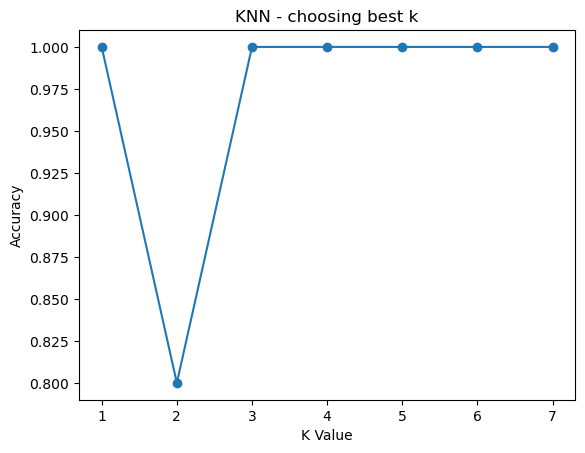

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ds=pd.read_csv("Knn_Customers.csv")
x=ds.iloc[:,:-1].values
y=ds.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_list=[]
k_values=range(1,8)

for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    accuracy_list.append(accuracy_score(y_test,y_pred))

plt.plot(k_values,accuracy_list,marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN - choosing best k")
plt.show()

In [6]:
best_k = k_values[np.argmax(accuracy_list)]
print("Best k:", best_k)

Best k: 1


In [7]:
knn_final=KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(x_train,y_train)
y_pred = knn_final.predict(x_test)
df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

   Actual  Predicted
0       0          0
1       1          1
2       0          0
3       1          1
4       0          0


In [8]:
import joblib
joblib.dump(knn_final,"knn_customer_model.pkl")
joblib.dump(sc,"scalar.pkl")
print("Model Saved Successufully!")


Model Saved Successufully!
